In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [2]:
H_ext_wall1=3.21#W/K)
H_ext_wall2=9.75#W/K)
H_int_wall1=3.26#W/K)
H_int_wall2=2.98#W/K)
H_windows=9.72 #W/K
H_doors=4.75 #W/K
H_int_wall3=8.09#W/K
H_int_wall4=10.78#W/K)

room_width=3.4 #m
room_length=6.7 #m

floor_area=room_width*room_length-(1.9+0.175)*(2*0.175)
room_height=3.4#m
room_volume=floor_area*room_height
min_air_ch=0.5 #/h
air_ch=3.1 #/h
e=0
epsilon=1
addit_heat_coef=11 #W/m^2
addit_heat=addit_heat_coef*floor_area #W

min_ex= room_volume*min_air_ch #m3/h
natural_inf=0
delta_t_nom=60 #degree C
Qrad_nom=152 #W/reb
Qrad=Qrad_nom*18 #num of reb

Hvent=0.34*min_ex

In [3]:
addit_heat_coef*floor_area

242.59125

In [4]:

file=pd.read_excel("Merged files.xlsx",header=0)
file['Datum i vrijeme'] = pd.to_datetime(file['Datum i vrijeme'],yearfirst=True)

In [5]:
file.columns

Index(['Datum i vrijeme', 'Plinomjer ist.zgrada 00062313Plin (m3)',
       'Brojilo el.energije su 35649294El.energija VT (kWh)',
       'Brojilo el.energije su 35649294El.energija MT (kWh)',
       'Brojilo el.energije tr 35649314El.energija VT (kWh)',
       'Brojilo el.energije tr 35649314El.energija MT (kWh)',
       'Vodomjer stara 09249850Voda (m3)', 'Vodomjer nova 09249847Voda (m3)',
       'Vodomjer hidrant 10058705Voda (m3)',
       'Brojilo el.energije ko 46621646El.energija VT (kWh)',
       'Brojilo el.energije ko 46621646El.energija MT (kWh)',
       'Brojilo el.energije po 38878959El.energija VT (kWh)',
       'Brojilo el.energije po 38878959El.energija MT (kWh)',
       'Brojilo el.energije kl 46868995El.energija VT (kWh)',
       'Brojilo el.energije kl 46868995El.energija MT (kWh)',
       'Kalorimetar 1 39024788Topl.energija (MWh)',
       'Kalorimetar 1 39024788Kum.protok (m3)',
       'Kalorimetar 1 39024788Tren.protok (m3/h)',
       'Kalorimetar 1 39024788Temp.pol

In [6]:
#Qt_1=-(H_ext_wall1+H_ext_wall2+H_windows)*(Tint-Text)
#Qv=-Hvent*(Tint-Text)
#Qint1=-(H_int_wall1+H_doors)*5#HALL
#Qint2=(H_int_wall3+H_int_wall4)*2#EXTRA ROOM
#Qadd=addit_heat
#Qint3=H_int_wall2*delta t

#ADJACENT ROOM


In [7]:
file=file.drop(['Brojilo el.energije ko 46621646El.energija VT (kWh)', 'Brojilo el.energije ko 46621646El.energija MT (kWh)','Brojilo el.energije po 38878959El.energija VT (kWh)',
       'Brojilo el.energije po 38878959El.energija MT (kWh)',
       'Brojilo el.energije kl 46868995El.energija VT (kWh)',
       'Brojilo el.energije kl 46868995El.energija MT (kWh)', 
        'Kalorimetar 2 39024724Topl.energija (MWh)',"Kalorimetar 2 39024724Temp.pol.voda (°C)",
        "Kalorimetar 2 39024724Temp.pov.voda (°C)",
        'Temp.senzor un.1 24003403Temperatura (°C)',
       'Temp.senzor un.1 24003403Vlažnost (%)',
       'Temp.senzor un.2 24004659Temperatura (°C)',
       'Temp.senzor un.2 24004659Vlažnost (%)',
       'Temp.senzor un.3 24003393Temperatura (°C)',
       'Temp.senzor un.3 24003393Vlažnost (%)',
      # 'Temp.senzor un.4 24004658Temperatura (°C)',
      # 'Temp.senzor un.4 24004658Vlažnost (%)',
       'Temp.senzor un.5 24007590Temperatura (°C)',
       'Temp.senzor un.5 24007590Vlažnost (%)',
       #'Temp.senzor un.6 24007412Temperatura (°C)',
       #'Temp.senzor un.6 24007412Vlažnost (%)',
       'Temp.senzor un.7 24007548Temperatura (°C)',
       'Temp.senzor un.7 24007548Vlažnost (%)',
       'Temp.senzor un.8 24007403Temperatura (°C)',
       'Temp.senzor un.8 24007403Vlažnost (%)',
       #'Temp.senzor vanj.1 25000099Temperatura (°C)',
      # 'Temp.senzor vanj.1 25000099Vlažnost (%)',       
                ],axis=1)

In [8]:
#file=file.drop(["Brojilo el.energije tr 35649314El.energija VT (kWh)","Brojilo el.energije tr 35649314El.energija MT (kWh)",
              # "Vodomjer stara 09249850Voda (m3)","Vodomjer nova 09249847Voda (m3)","Vodomjer hidrant 10058705Voda (m3)"],axis=1)

In [9]:
file["QT_1"]=-(H_ext_wall1+H_ext_wall2+H_windows)*(file["Temp.senzor un.4 24004658Temperatura (°C)"]-file['Temp.senzor vanj.1 25000099Temperatura (°C)'])

In [10]:
file["Qv"]=-Hvent*(file["Temp.senzor un.4 24004658Temperatura (°C)"]-file['Temp.senzor vanj.1 25000099Temperatura (°C)'])

In [11]:
file["Qint1-Hall"]=-(H_int_wall1+H_doors)*5#HALL
file["Qint2-Extra room"]=(H_int_wall3+H_int_wall4)*2#EXTRA ROOM
file["Qadd"]=addit_heat
file["Qint3-Adj room"]=H_int_wall2*(file["Temp.senzor un.4 24004658Temperatura (°C)"]-file['Temp.senzor un.6 24007412Temperatura (°C)'])
for k,value in enumerate(file["Qint3-Adj room"].values):
    if value>0:
        file["Qint3-Adj room"].values[k]=-file["Qint3-Adj room"].values[k]
    elif value<0:
        file["Qint3-Adj room"].values[k]=-file["Qint3-Adj room"].values[k]
    else:
        pass
        #ADJACENT ROOM

In [12]:
delta_t_nom=60
t_room_set=20
file["Delta t"]=(file['Kalorimetar 1 39024788Temp.pol.voda (°C)']+file['Kalorimetar 1 39024788Temp.pov.voda (°C)'])/2-t_room_set
       

In [13]:
file["Qrad"]=Qrad*(file["Delta t"]/delta_t_nom)**1.33

In [14]:
file["Qgub"]=np.NaN
file["Qplus"]=np.NaN
file["Balance"]=np.NaN
for k,value in enumerate(file["Qint3-Adj room"].values):
    if value<0:
        file["Qgub"].values[k]=np.abs(file["QT_1"].values[k]+file["Qv"].values[k]+file["Qint3-Adj room"].values[k]+file["Qint1-Hall"].values[k])
        file["Qplus"].values[k]=np.abs(file["Qrad"].values[k]+file["Qadd"].values[k]+file["Qint2-Extra room"].values[k])
    elif value>0:
        file["Qgub"].values[k]=np.abs(file["QT_1"].values[k]+file["Qv"].values[k]+file["Qint1-Hall"].values[k])
        file["Qplus"].values[k]=np.abs(file["Qrad"].values[k]+file["Qadd"].values[k]+file["Qint2-Extra room"].values[k]+file["Qint3-Adj room"].values[k])
    else:
        pass
file["Balance"]=np.abs(file["Qplus"]-file["Qgub"])

<function matplotlib.pyplot.show(*args, **kw)>

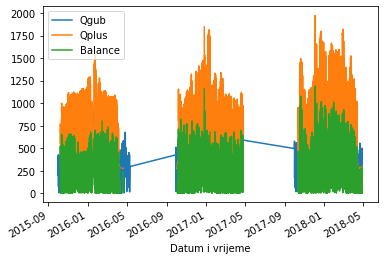

In [15]:
a=np.abs(file["Qgub"])
b=np.abs(file["Balance"])

file.plot(x="Datum i vrijeme", y=["Qgub","Qplus","Balance"], kind="line")
plt.show
